**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [0]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [0]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [0]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_data1 = train_data.astype('float')
test_data1 = test_data.astype('float')
p = Sequential()
p.add(Dense(512, activation='relu', input_shape=(dimData,)))
p.add(Dense(512, activation='relu'))
p.add(Dense(10, activation='softmax'))
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data1, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data1, test_labels_one_hot))

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [0]:
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 9s 158us/step - loss: 0.8003 - acc: 0.7297 - val_loss: 0.3905 - val_acc: 0.8828
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.4286 - acc: 0.8676 - val_loss: 0.5404 - val_acc: 0.8366
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.3576 - acc: 0.8911 - val_loss: 0.4802 - val_acc: 0.8481
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.3073 - acc: 0.9066 - val_loss: 0.2481 - val_acc: 0.9252
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.2618 - acc: 0.9204 - val_loss: 0.3857 - val_acc: 0.8799
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.2229 - acc: 0.9314 - val_loss: 0.2794 - val_acc: 0.9157
Epoch 7/20
60000/60000 [=

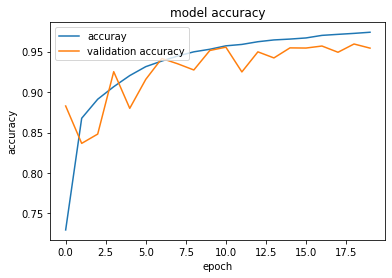

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy'], loc='upper left')
plt.show()

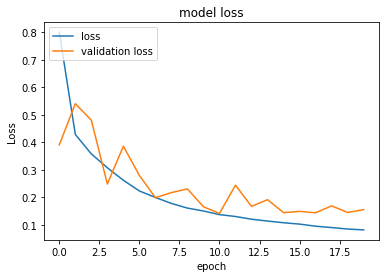

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

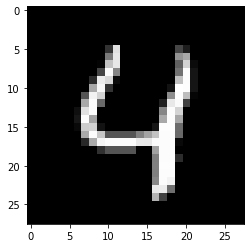

In [26]:
plt.imshow(test_images[4,:,:],cmap='gray')

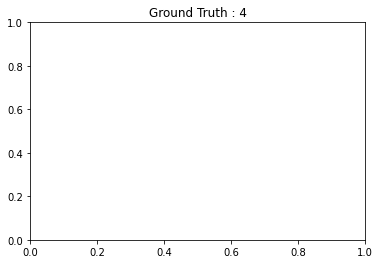

In [27]:

plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()

In [28]:

x=model.predict_classes(test_data[[4],:])
print("Predicted label",test_labels[x])

Predicted label [4]


In [29]:
from keras.models import Model
p = Model()

p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0749 - acc: 0.9752 - val_loss: 0.1451 - val_acc: 0.9592
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0699 - acc: 0.9773 - val_loss: 0.1706 - val_acc: 0.9517
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0649 - acc: 0.9791 - val_loss: 0.1818 - val_acc: 0.9479
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0637 - acc: 0.9781 - val_loss: 0.1953 - val_acc: 0.9443
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0581 - acc: 0.9808 - val_loss: 0.1505 - val_acc: 0.9587
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0534 - acc: 0.9824 - val_loss: 0.1455 - val_acc: 0.9615
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0491 - acc: 0.9840 - val_loss: 0.1401 - val_acc